In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import re
from sklearn.preprocessing import MinMaxScaler
import networkx as nx 

G = nx.Graph()
pd.set_option('display.width',600)
pd.set_option('display.max_columns',10)

In [0]:
def plot_bar_x(data):
    plt.figure(1,figsize=(50,30))
    data=data.head(30)
    # this is for plotting purpose
    index = np.arange(len(data.index))
    plt.bar(index, data['NAME'])
    plt.xlabel('Item Names', fontsize=30)
    plt.ylabel('Items Sold Count', fontsize=30)
    plt.xticks(index, data.index, fontsize=30, rotation=90)
    plt.title('Frequency Distribution Of Each Item')
    plt.show()


def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    if x=='nan':
        return 0


In [0]:
le = preprocessing.LabelEncoder()
df=pd.read_csv('Market_basket_df.csv')

In [31]:
df.head()

,DATENEW,RECEIPT,NAME,UNITS
0,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Pumpkin Japanese/Kent,3.292
1,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Orange navel,0.290
2,2016-03-16,f4dd518d-1fd8-4339-abc6-2c5390c20e30,Orange navel,-1.000
3,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Australian Asparagus green,3.292
4,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Nice Munchee 200g,1.000


In [32]:
df=df.iloc[353810:530528,:]
print(df)

           DATENEW                               RECEIPT                  NAME  UNITS
353810  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f        Tomatoes Truss  0.484
353811  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f        Peaches Yellow  0.962
353812  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f           Onion brown  0.824
353813  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f  Peeled Plum Tomatoes  5.000
353814  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f          Pumpkin Grey  0.944
...            ...                                   ...                   ...    ...
366602  2018-01-22  ba903335-73c3-47b9-81ca-789bd35ad6e6        Field Tomatoes  0.594
366603  2018-01-22  ba903335-73c3-47b9-81ca-789bd35ad6e6          Chilli green  0.248
366604  2018-01-22  c3bf6d6c-bc3c-45ee-9bd4-5f63399eee8e      Banana Cavendish  1.034
366605  2018-01-22  7ffed17f-bdc2-4a3a-a747-e8cdc7a6842a             Coriander  2.000
366606  2018-01-22  16ec8da3-a1b7-4d5f-bb79-82b5da11bf

In [33]:
df['NAME'] = df['NAME'].str.strip()
df['RECEIPT'] = df['RECEIPT'].astype('str')
df['UNITS'] = df['UNITS'].astype('float64')
df['UNITS'] = df['UNITS'].round(0)

print(df)

           DATENEW                               RECEIPT                  NAME  UNITS
353810  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f        Tomatoes Truss    0.0
353811  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f        Peaches Yellow    1.0
353812  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f           Onion brown    1.0
353813  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f  Peeled Plum Tomatoes    5.0
353814  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f          Pumpkin Grey    1.0
...            ...                                   ...                   ...    ...
366602  2018-01-22  ba903335-73c3-47b9-81ca-789bd35ad6e6        Field Tomatoes    1.0
366603  2018-01-22  ba903335-73c3-47b9-81ca-789bd35ad6e6          Chilli green    0.0
366604  2018-01-22  c3bf6d6c-bc3c-45ee-9bd4-5f63399eee8e      Banana Cavendish    1.0
366605  2018-01-22  7ffed17f-bdc2-4a3a-a747-e8cdc7a6842a             Coriander    2.0
366606  2018-01-22  16ec8da3-a1b7-4d5f-bb79-82b5da11bf

                         NAME
Banana Cavendish          844
Watermelon seedless       520
Cherries                  368
Field Tomatoes            335
Nectarine White           306
...                       ...
Vindaloo Masala 50g         1
Polos In Brine              1
Vegetable oil 2lt           1
Mastiha 15g                 1
MD kithul Treacle 350ml     1

[516 rows x 1 columns]


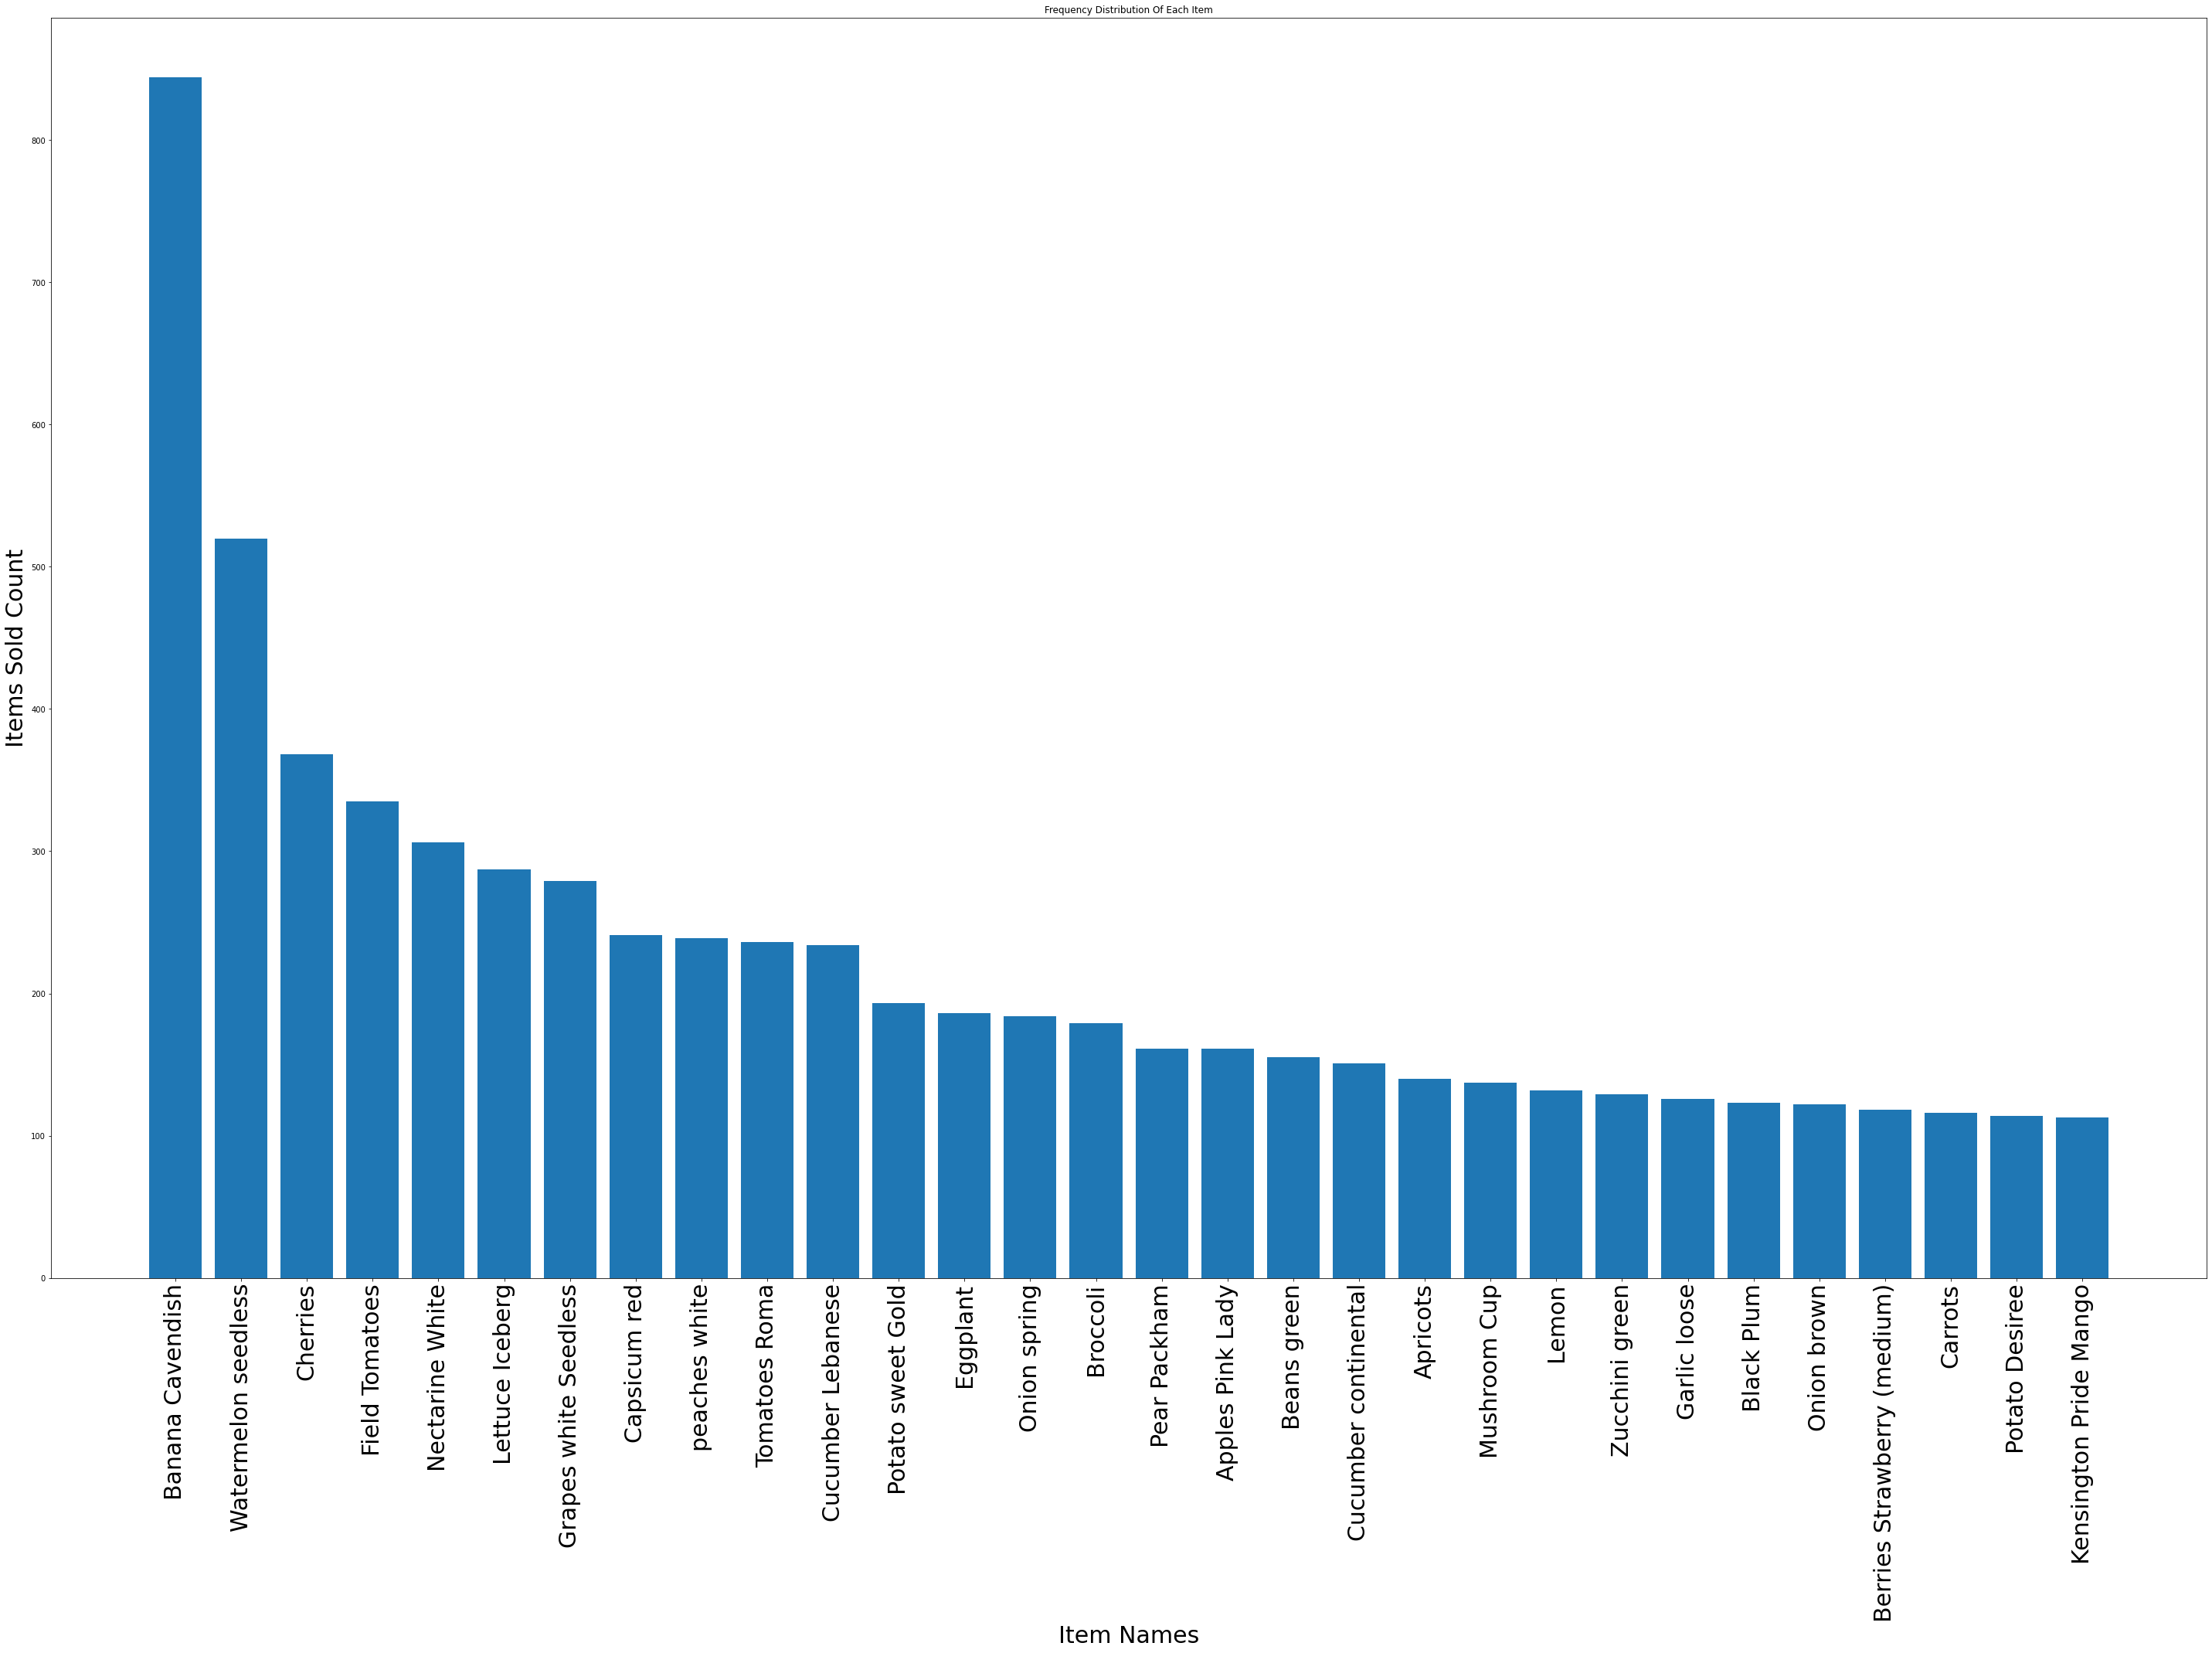

In [34]:
item_frequency=df['NAME'].value_counts()
item_frequency=pd.DataFrame(item_frequency)
print(item_frequency)
plot_bar_x(item_frequency)

In [0]:
basket = (df
          .groupby(['RECEIPT', 'NAME'])['UNITS']
          .sum().unstack().reset_index().fillna(0)
          .set_index('RECEIPT'))

In [36]:
print(basket.head(1000))


NAME                                  2kg Marsh Grapefruit  3kg Valencia Oranges  Adzuki Beans 500g  Al Nakhil Tahina 454g  Alfa Alfa  ...  vanila powder 15g  wash potatoes 5kg  white Raw Rice 5kg Derana  wijaya kurakkan Flour 400g  wombok half
RECEIPT                                                                                                                                ...                                                                                                          
0026e196-660b-455a-a7f8-d0312f999e5f                   0.0                   0.0                0.0                    0.0        0.0  ...                0.0                0.0                        0.0                         0.0          0.0
002bda24-52a1-4454-864f-69226b725d91                   0.0                   0.0                0.0                    0.0        0.0  ...                0.0                0.0                        0.0                         0.0          0.0
00402eef-5f39-419b-b

In [37]:
basket_sets = basket.applymap(encode_units)
print(basket_sets)

NAME                                  2kg Marsh Grapefruit  3kg Valencia Oranges  Adzuki Beans 500g  Al Nakhil Tahina 454g  Alfa Alfa  ...  vanila powder 15g  wash potatoes 5kg  white Raw Rice 5kg Derana  wijaya kurakkan Flour 400g  wombok half
RECEIPT                                                                                                                                ...                                                                                                          
0026e196-660b-455a-a7f8-d0312f999e5f                     0                     0                  0                      0          0  ...                  0                  0                          0                           0            0
002bda24-52a1-4454-864f-69226b725d91                     0                     0                  0                      0          0  ...                  0                  0                          0                           0            0
00402eef-5f39-419b-b

In order to find out interesting rules out of multiple possible rules from this small business scenario, we will be using the following matrices:

Support: Its the default popularity of an item. In mathematical terms, the support of item A is nothing but the ratio of transactions involving A to the total number of transactions.

Support(Grapes) = (Transactions involving Grapes)/(Total transaction)
Support(Grapes) = 0.666

2. Confidence: Likelihood that customer who bought both A and B. Its divides the number of transactions involving both A and B by the number of transactions involving B.

Confidence(A => B) = (Transactions involving both A and B)/(Transactions involving only A)

Confidence({Grapes, Apple} => {Mango}) = Support(Grapes, Apple, Mango)/Support(Grapes, Apple)

= 2/6 / 3/6

= 0.667

3. Lift : Increase in the sale of A when you sell B.

Lift(A => B) = Confidence(A, B) / Support(B)

Lift ({Grapes, Apple} => {Mango}) = 1

So, likelihood of a customer buying both A and B together is ‘lift-value’ times more than the chance if purchasing alone.

Lift (A => B) = 1 means that there is no correlation within the itemset.

Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.

Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Association Rule-based algorithms are viewed as a two-step approach:
Frequent Itemset Generation: Find all frequent item-sets with support >= pre-determined min_support count

Rule Generation: List all Association Rules from frequent item-sets. Calculate Support and Confidence for all rules. Prune rules that fail min_support and min_confidence thresholds.

In [49]:
# chỉ xét các items có tần suất lớn hơn bằng 0.004
frequent_itemsets = apriori(basket_sets, min_support=0.004, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.014624                             (3kg Valencia Oranges)
1    0.007605                                      (Apples Fuji)
2    0.004972                          (Apples Golden Delicious)
3    0.012284                              (Apples Granny Smith)
4    0.033343                                 (Apples Pink Lady)
..        ...                                                ...
236  0.005265  (Grapes white Seedless, Banana Cavendish, Wate...
237  0.005557  (Lettuce Iceberg, Banana Cavendish, Watermelon...
238  0.004972  (Pear Packham, Banana Cavendish, Nectarine White)
239  0.004387  (Nectarine White, Banana Cavendish, Watermelon...
240  0.005265  (Nectarine White, peaches white, Banana Cavend...

[241 rows x 2 columns]


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

                             antecedents                          consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
0                 (3kg Valencia Oranges)                   (Banana Cavendish)            0.014624            0.209125  0.005850    0.400000  1.912727  0.002791    1.318124
1                     (Banana Cavendish)               (3kg Valencia Oranges)            0.209125            0.014624  0.005850    0.027972  1.912727  0.002791    1.013732
2                     (Banana Cavendish)                   (Apples Pink Lady)            0.209125            0.033343  0.015209    0.072727  2.181180  0.008236    1.042473
3                     (Apples Pink Lady)                   (Banana Cavendish)            0.033343            0.209125  0.015209    0.456140  2.181180  0.008236    1.454189
4                     (Apples Pink Lady)               (Cucumber continental)            0.033343            0.044165  0.004387    0.131579 

In [0]:
rules=pd.DataFrame(rules)

In [0]:
for x in range(len(rules)):
    result1=re.findall(r"\w+ \w+|\w+",str(rules['antecedents'][x]))
    result2=re.findall(r"\w+ \w+|\w+",str(rules['consequents'][x]))
    rules.at[x, 'antecedents'] = result1[1]
    rules.at[x, 'consequents'] = result2[1]

In [48]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,3kg Valencia,Banana Cavendish,0.014624,0.209125,0.005850,0.400000,1.912727,0.002791,1.318124
1,Banana Cavendish,3kg Valencia,0.209125,0.014624,0.005850,0.027972,1.912727,0.002791,1.013732
2,Banana Cavendish,Apples Pink,0.209125,0.033343,0.015209,0.072727,2.181180,0.008236,1.042473
3,Apples Pink,Banana Cavendish,0.033343,0.209125,0.015209,0.456140,2.181180,0.008236,1.454189
4,Apples Pink,Cucumber continental,0.033343,0.044165,0.004387,0.131579,2.979261,0.002915,1.100659
...,...,...,...,...,...,...,...,...,...
265,Nectarine White,peaches white,0.023984,0.049722,0.005265,0.219512,4.414778,0.004072,1.217544
266,peaches white,Nectarine White,0.017549,0.068149,0.005265,0.300000,4.402146,0.004069,1.331216
267,Nectarine White,peaches white,0.068149,0.017549,0.005265,0.077253,4.402146,0.004069,1.064703
268,peaches white,Nectarine White,0.049722,0.023984,0.005265,0.105882,4.414778,0.004072,1.091597
